In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("/home/black_tree/Documents/computer_science/capstone-ML-project/data/diabetes_012_health_indicators_BRFSS2015.csv")
df2 = pd.read_csv("/home/black_tree/Documents/computer_science/capstone-ML-project/data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df3 = pd.read_csv("/home/black_tree/Documents/computer_science/capstone-ML-project/data/diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
def collapse(x):
    if x == 0:
        return 0
    else:
        return 1
    

In [5]:
df1["Diabetes_012"] = df1["Diabetes_012"].apply(collapse)

In [6]:
df1.rename(columns={"Diabetes_012":"Diabetic"}, inplace=True)
df2.rename(columns={"Diabetes_binary":"Diabetic"}, inplace=True)
df3.rename(columns={"Diabetes_binary":"Diabetic"}, inplace=True)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetic              253680 non-null  int64  
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
BMI = scaler.fit_transform([df1["BMI"]])

In [10]:
df1["BMI"] = BMI[0]


In [11]:
df2["BMI"] = scaler.fit_transform([df2["BMI"]])[0]
df3["BMI"] = scaler.fit_transform([df3["BMI"]])[0]

In [12]:
df3["BMI"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: BMI, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split 

df1_train, df1_test = train_test_split(df1, train_size=0.8)
df2_train, df2_test = train_test_split(df2, train_size=0.8)
df3_train, df3_test = train_test_split(df3, train_size=0.8)

In [14]:
testing = pd.concat([df1_test, df2_test, df3_test], axis=0)

In [15]:
testing.shape

(115611, 22)

In [16]:
df1_train.shape[0] + df2_train.shape[0] + df3_train.shape[0]

462441

In [17]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=42)
df1_x, df1_y = sampler.fit_resample(df1_train.drop("Diabetic", axis=1), df1_train["Diabetic"])
df2_x, df2_y = df2_train.drop("Diabetic", axis=1), df2_train["Diabetic"]
df3_x, df3_y = sampler.fit_resample(df3_train.drop("Diabetic", axis=1),df3_train["Diabetic"])

In [18]:
x_train_uc = pd.concat([df1_x,
                    df2_x,
                    df3_x], axis=0)

y_train_uc = pd.concat([df1_y,
                    df2_y,
                    df3_y], axis=0)

In [19]:
x_train_uc.shape, y_train_uc.shape

((177055, 21), (177055,))

In [20]:
from imblearn.over_sampling import RandomOverSampler
roc = RandomOverSampler(random_state=42)
df1_x_oc, df1_y_oc = roc.fit_resample(df1_train.drop("Diabetic", axis=1), df1_train["Diabetic"])
df3_x_oc, df3_y_oc = roc.fit_resample(df3_train.drop("Diabetic", axis=1),df3_train["Diabetic"])

In [21]:
x_train_oc = pd.concat([df1_x_oc,
                    df2_x,
                    df3_x_oc], axis=0)

y_train_oc = pd.concat([df1_y_oc,
                    df2_y,
                    df3_y_oc], axis=0)

In [22]:
x_train_oc.shape

(747827, 21)

In [23]:
x_test , y_test = testing.drop("Diabetic", axis=1), testing["Diabetic"]

In [24]:
# intialise all the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
lr = LogisticRegression(random_state=42)
knnc = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state = 42)

In [25]:
# intialise the metrics 
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve, confusion_matrix

In [26]:
training_data_oc = [x_train_uc, y_train_uc]
all_the_models = [lr,
knnc,
rfc,
xgb,]

In [27]:
for model in all_the_models:
    print(f"the training model is {model}")
    model.fit(training_data_oc[0], training_data_oc[1])

the training model is LogisticRegression(random_state=42)


/home/black_tree/Documents/computer_science/capstone-ML-project/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the training model is KNeighborsClassifier()
the training model is RandomForestClassifier(random_state=42)
the training model is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [28]:
p_lr = lr.predict(x_train_uc)
p_knnc = knnc.predict(x_train_uc)
p_rfc = rfc.predict(x_train_uc)
p_xgb = xgb.predict(x_train_uc)


In [29]:
s_lr = lr.predict_proba(x_train_uc)
s_knnc = knnc.predict_proba(x_train_uc)
s_rfc = rfc.predict_proba(x_train_uc)
s_xgb = xgb.predict_proba(x_train_uc)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc = {"lr": None,
       "knnc": None, "rfc": None, "xgb": None}

pred = [p_lr
,p_knnc
,p_rfc
,p_xgb]

probab = [s_lr,
s_knnc,
s_rfc,
s_xgb,]

for model in all_the_models:
    i = 0
    for key in acc:
        acc[key] = accuracy_score(y_true= y_train_uc, y_pred= pred[i])
        i += 1

In [32]:
recall = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}
presc = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}
roc = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}
cm = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}


In [33]:
probab[0][:, 1]

array([0.14963691, 0.71621909, 0.69123925, ..., 0.49537221, 0.88572429,
       0.41489809], shape=(177055,))

In [34]:
for model in all_the_models:
    i = 0
    for key in recall:
        recall[key] = recall_score(y_true= y_train_uc, y_pred= pred[i])
        i += 1

for model in all_the_models:
    i = 0
    for key in presc:
        presc[key] = precision_score(y_true= y_train_uc, y_pred= pred[i])
        i += 1

for model in all_the_models:
    i = 0
    for key in roc:
        roc[key] = roc_auc_score(y_true= y_train_uc, y_score= probab[i][:, 1])
        i += 1


for model in all_the_models:
    i = 0
    for key in cm:
        cm[key] = confusion_matrix(y_true= y_train_uc, y_pred= pred[i])
        i += 1

In [35]:
print("Accuracy:")
for k in acc:
    a = format(acc[k], ".4f")
    print(f"   # {k}: {a}")

Accuracy:
   # lr: 0.7326
   # knnc: 0.8444
   # rfc: 0.9568
   # xgb: 0.7635


In [36]:
print("Roc score")
for k in  roc:
    r = roc[k]
    print(f"  # {k}: {r:.2f}")

Roc score
  # lr: 0.81
  # knnc: 0.92
  # rfc: 0.99
  # xgb: 0.85


In [37]:
print("Precision and Recall")
for k in recall:
    rec = recall[k]
    pre = presc[k]
    print(f" # {k}: {rec:.2f} | {pre:.2f}")

Precision and Recall
 # lr: 0.75 | 0.72
 # knnc: 0.88 | 0.82
 # rfc: 0.96 | 0.95
 # xgb: 0.82 | 0.74


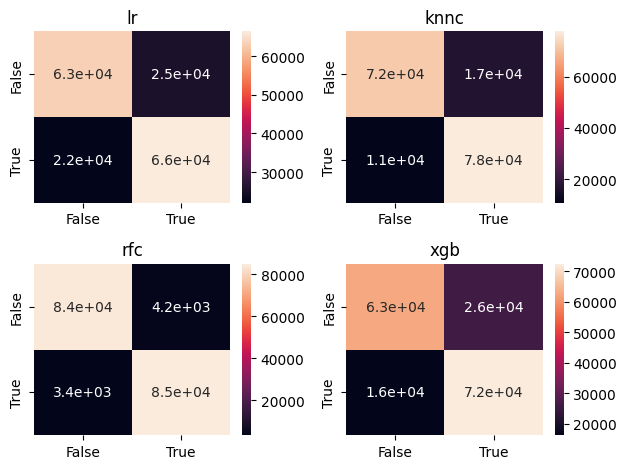

In [38]:
fig, ax = plt.subplots(nrows=2 , ncols=2)
models = ["lr", "knnc", "rfc", "xgb"]
k = 0
for i in range(2):

    for j in range(2):
        sns.heatmap(cm[models[k]], ax=ax[i][j], annot=True, 
                    xticklabels=["False", "True"], yticklabels=["False", "True"]
                    )
        ax[i][j].set_title(models[k])
        k += 1
        
plt.tight_layout()

In [70]:
train = pd.concat([x_train_uc, y_train_uc], axis= 1)

In [71]:
y_train_uc.isnull().value_counts()
x_train_uc.shape
train.shape

(177055, 22)

In [72]:
train.to_csv("/home/black_tree/Documents/computer_science/capstone-ML-project/data/trainig_data.csv", index= False)

In [73]:
test = pd.concat([x_test, y_test], axis=1)

In [74]:
test.to_csv("/home/black_tree/Documents/computer_science/capstone-ML-project/data/testing_data.csv", index= False)

In [49]:
models = recall.keys()
recall_s = recall.values()
prescion = presc.values()
confusion_mat = cm.values()
roc_area = roc.values()
model_number = ["pass 1" for _ in range(4)]

df_metrics = pd.DataFrame({"models" : models, 
                                   "recall" : recall_s, 
                                   "precision_score": prescion, 
                                   "cm": confusion_mat, 
                                   "roc" : roc_area, 
                                   "model number": model_number})



In [50]:
df_metrics.head()

,models,recall,precision_score,cm,roc,model number
0,lr,0.750771,0.724370,"[[63256, 25286], [22060, 66453]]",0.805781,pass 1
1,knnc,0.878583,0.822390,"[[71747, 16795], [10747, 77766]]",0.918507,pass 1
2,rfc,0.961136,0.952879,"[[84335, 4207], [3440, 85073]]",0.993432,pass 1
3,xgb,0.817530,0.737740,"[[62818, 25724], [16151, 72362]]",0.845588,pass 1


In [ ]:
# df_metrics.to_csv("/home/black_tree/Documents/computer_science/capstone-ML-project/data/metrics.csv", index=False)